In [30]:
# 패지지 임포트
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
import matplotlib.pyplot as plt

In [3]:
# 0. scaling 할 numpy 선언
scale_data = np.array([-150,-110,-30,0,20,30,110,120,130,150])
print(scale_data)

[-150 -110  -30    0   20   30  110  120  130  150]


In [4]:
# 1. StandardScaler : 평균을 0, 분산을 1로 변경됩니다.(이상치에 영향이 큽니다.)
standardscaler = StandardScaler()
print(scale_data, ',', standardscaler)
std_scaling = standardscaler.fit_transform(scale_data.reshape(-1,1))
print(std_scaling)

[-150 -110  -30    0   20   30  110  120  130  150] , StandardScaler(copy=True, with_mean=True, with_std=True)
[[-1.81207562]
 [-1.40256701]
 [-0.58354978]
 [-0.27641832]
 [-0.07166401]
 [ 0.03071315]
 [ 0.84973038]
 [ 0.95210753]
 [ 1.05448469]
 [ 1.25923899]]


In [5]:
# 2. MinmaxScaler : 모든 feature가 0과 1 사이에 위치하게 만듭니다.(이상치가 있을경우 다른 값들이 매우 압축된 범위에서만 움직이게 됩니다.)
minmaxscaler = MinMaxScaler()
mm_scaling = minmaxscaler.fit_transform(scale_data.reshape(-1,1))
print(mm_scaling)


[[0.        ]
 [0.13333333]
 [0.4       ]
 [0.5       ]
 [0.56666667]
 [0.6       ]
 [0.86666667]
 [0.9       ]
 [0.93333333]
 [1.        ]]


In [6]:
# 3. MaxAbsScaler : 절대값이 0~1사이에 매핑되도록 합니다. 즉 -1~1 사이로 재조정됩니다.
# 양수 데이터로만 구성된 특징 데이터 셋에서는 MinMaxScaler와 유사하게 동작하며, 큰 이상치에 민감할 수 있습니다.
maxabsscaler = MaxAbsScaler()
maxabs_scaling = maxabsscaler.fit_transform(scale_data.reshape(-1,1))
print(maxabs_scaling)

[[-1.        ]
 [-0.73333333]
 [-0.2       ]
 [ 0.        ]
 [ 0.13333333]
 [ 0.2       ]
 [ 0.73333333]
 [ 0.8       ]
 [ 0.86666667]
 [ 1.        ]]


In [7]:
# 4. RobustScaler : 모든 특성들이 같은 크기를 갖는다는 점에서 StandardScaler와 비슷하지만, 평균과 분산 대신 median과 quantile을 사용합니다.
# 아웃라이어(이상치)에 영향을 최소화한 기법입니다. 중앙값(median)과 IQR(Interquantile range)을 사용하기 때문에 StandardScaler와 비교해보면
# IQR = Q3 - Q1 : 즉, 25퍼센타일과 75퍼센타일의 값들을 다룬다.
# 표준화 후 동일한 값을 더 넓게 분포시키고 있음을 확인 할 수 있습니다.
robustscaler = RobustScaler()
rb_scaling = robustscaler.fit_transform(scale_data.reshape(-1,1))
print(rb_scaling)

[[-1.25      ]
 [-0.96428571]
 [-0.39285714]
 [-0.17857143]
 [-0.03571429]
 [ 0.03571429]
 [ 0.60714286]
 [ 0.67857143]
 [ 0.75      ]
 [ 0.89285714]]


In [9]:
############################################################################################
# 스케일링 하기
# 실습 데이터 불러오기
df = pd.read_csv('C:\\Users\\wai\\Desktop\\프로젝트\\교육자료\\교육데이터\\BookExample.csv')
print(df)

          ID  target        v1        v2 v3        v4         v5        v6  \
0          3       1  1.335739  8.727474  C  3.921026   7.915266  2.599278   
1          4       1  0.000000  0.000000  C  0.000000   9.191265  0.000000   
2          5       1  0.943877  5.310079  C  4.410969   5.326159  3.979592   
3          6       1  0.797415  8.304757  C  4.225930  11.627438  2.097700   
4          8       1  0.000000  0.000000  C  0.000000   0.000000  0.000000   
...      ...     ...       ...       ... ..       ...        ...       ...   
19995  40048       1  0.000000  0.000000  C  0.000000   0.000000  0.000000   
19996  40051       1  2.019311  3.284808  C  1.954289   8.942205  2.535684   
19997  40052       0  0.913579  8.132525  C  3.555315  12.461332  2.580248   
19998  40055       1  0.000000  0.000000  C  0.000000   0.000000  0.000000   
19999  40056       0  0.487483  7.638427  C  4.044045   8.511991  1.299956   

             v7        v8  ...   v22           v23  v24       v

In [18]:
# 'v20' 변수 최대, 최소값 확인
print(list(df.columns).index('v20'))
print('최대 :', df.iloc[:,21].max(),'최소 :', df.iloc[:,21].min())

21
최대 : 20.0000008 최소 : 0.0


StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.99283532]
 [-1.14182311]
 [ 0.88910184]
 ...
 [ 0.92755013]
 [-1.14182311]
 [ 0.85043748]]


(array([1.90800294e+00, 0.00000000e+00, 2.20987137e-04, 0.00000000e+00,
        1.10493568e-03, 5.08270415e-03, 2.85073407e-02, 1.49829279e-01,
        1.04129139e+00, 1.28570316e+00]),
 array([-1.14182311, -0.9155656 , -0.68930809, -0.46305057, -0.23679306,
        -0.01053555,  0.21572197,  0.44197948,  0.66823699,  0.8944945 ,
         1.12075202]),
 <a list of 10 Patch objects>)

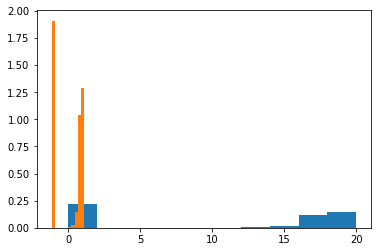

In [46]:
# 1. StandardScaler : 평균을 0, 분산 1인 데이터로 변경합니다.
standardscaler= StandardScaler()
print(standardscaler) # 스케일러 객체

var_array = np.array(df.iloc[:,21])
# 스케일링을 하기위해 2차원 행렬로 변환
scale_array = var_array.reshape(-1,1)
# StandardScaler 스케일링
std_scaling = standardscaler.fit_transform(scale_array)
print(std_scaling)

# 히스토그램으로 표현(RAW 데이터 확률밀도)
plt.hist(var_array, density=True)
# 히스토그램으로 표현(스케일링한 데이터 확률밀도)
plt.hist(std_scaling, density=True)

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.94346411]
 [0.        ]
 [0.89761658]
 ...
 [0.91460974]
 [0.        ]
 [0.88052793]]


(array([4.317e+00, 0.000e+00, 5.000e-04, 0.000e+00, 2.500e-03, 1.150e-02,
        6.450e-02, 3.390e-01, 2.356e+00, 2.909e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

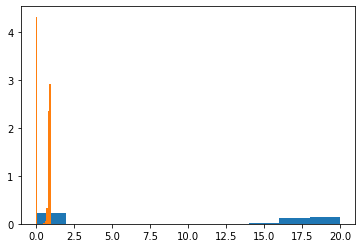

In [47]:
# 2. MinmaxScaler : 모든 데이터 값이 0과 1사이의 값들로 매핑됩니다.
minmaxscaler= MinMaxScaler()
print(minmaxscaler) # 스케일러 객체

# StandardScaler 스케일링
mms_scaling = minmaxscaler.fit_transform(scale_array)
print(mms_scaling)

# 히스토그램으로 표현(RAW 데이터 분포)
plt.hist(var_array, density=True)
# 히스토그램으로 표현(스케일링한 데이터 분포)
plt.hist(mms_scaling, density=True)

In [ ]:
# 3. MaxAbsScaler : 절대값이 0~1사이에 매핑되도록 합니다. 즉 -1~1 사이로 재조정됩니다..
minmaxscaler= MaxAbsScaler()
print(minmaxscaler) # 스케일러 객체

# StandardScaler 스케일링
mms_scaling = minmaxscaler.fit_transform(scale_array)
print(mms_scaling)

# 히스토그램으로 표현(RAW 데이터 분포)
plt.hist(var_array, density=True)
# 히스토그램으로 표현(스케일링한 데이터 분포)
plt.hist(mms_scaling, density=True)